## Plotting seasonal means of phytoplankton biomass and DIN at the North Atlantic
This is an example script to show how to open multiple MEDUSA outputs, and plot them as seasonal means

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import matplotlib
import glob
import numpy as np

# set default font size
matplotlib.rcParams.update({"font.size": 8})

For our seasonal plot, first, we set a path of where the monthly files are, then we use 'glob' module to search our ptrc files which contains phytoplankton biomass (PHN and PHD) and DIN within the folder

In [2]:
path = '/gws/nopw/j04/class_vol1/CLASS-MEDUSA/OUT_eORCA1/A009/monthly/2006/'
wcard= '*_ptrc_T.nc'

mphys=[]
mdins=[]

months=[]
# Set the lat and lon for the N. Atlantic
# Select longitude and latitude
lonmax=-73
lonmin= 12

latmax= 70
latmin=0

import datetime
for f, filename in enumerate(glob.glob(path+wcard, recursive=True)):
    # get data
    ds = xr.open_dataset(filename, chunks=-1)
    ds = ds.squeeze()
    ds_100m = ds.sel(deptht=slice(0,100))
    phy1 = ds_100m.PHN
    phy2 = ds_100m.PHD
    phy = phy1+phy2 # Total phytoplankton is nondiatom + diatom 
    din = ds_100m.DIN
    phy= phy.where(phy >1e-25)
    din= din.where(din >1e-25)
    
    # Now we cut off the Lat and long
    mask_lon=(phy['nav_lon']>= lonmax) & (phy['nav_lon']<=lonmin)
    mask_lat=(phy['nav_lat']<= latmax) & (phy['nav_lat']>=latmin)

    # Calculate means
    cphy=phy.where(mask_lat & mask_lon).mean()
    cdin=din.where(mask_lat & mask_lon).mean()

    # Get month name
    month_num = str(f+1)
    dt= datetime.datetime.strptime(month_num, "%m")
    month_name= dt.strftime("%b")

    # Append the mean seasonal phy biomass and DIN
    mphys.append(cphy)
    mdins.append(cdin)
    months.append(month_name)
    

Now we can see what is like every month by plotting it

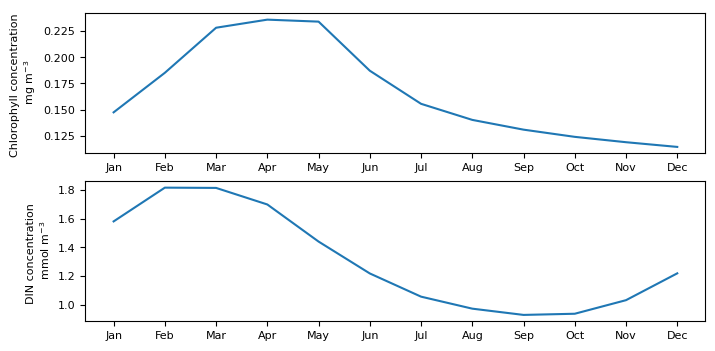

In [3]:
# getting xticks as months
mnum=np.arange(1,13)

fig, axs = plt.subplots(2, 1, figsize=(8,4))
surf_means= [mphys, mdins]
ylabels= ['Phytoplankton biomass \n mmol m$^{-3}$','DIN concentration \n mmol m$^{-3}$']
         
for a, ax in enumerate(axs):
    ax.plot(mnum, surf_means[a])
    ax.set_xticks(mnum, months);
    ax.set_ylabel(ylabels[a])


# plt.subplot(2,1,2)
# plt.plot(dins)


We can also see the projection of phytoplankton biomass and DIN concentration into the future (from 2014-2100), by looking at the annual means of the output. But this going to take a while to show it.

In [4]:
pathyr = '/gws/nopw/j04/class_vol1/CLASS-MEDUSA/OUT_eORCA1/A009/annual/'
years= np.arange(2014,2101)
wcard= '*_ptrc_T.nc'
mphy =[]
mdin =[]
for y in years:
    path1=pathyr+str(y)+'/' # We have to make our year into a string so python knows which path
    for fn in glob.glob(path1+wcard, recursive=True):
        ds = xr.open_dataset(fn, chunks=-1)
        ds = ds.squeeze()
        ds_surf = ds.sel(deptht=slice(0,100))
        phy1 = ds_surf.PHN
        phy2 = ds_surf.PHD
        phy =  phy1+phy2 
        din = ds_surf.DIN
        # Calculate means
        cphy=phy.where(mask_lat & mask_lon).mean()
        cdin=din.where(mask_lat & mask_lon).mean()
        mphy.append(cphy)
        mdin.append(cdin)


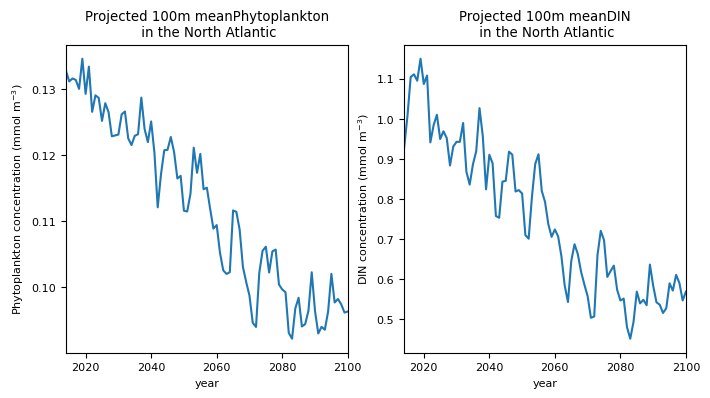

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(8,4))
pphy= axs[0].plot(years,mphy)
pdin= axs[1].plot(years,mdin)

labels=['Phytoplankton concentration (mmol m$^{-3}$)', 'DIN concentration (mmol m$^{-3}$)']
vars= ['Phytoplankton', 'DIN']
for i, ax in enumerate(axs):
    ax.set_ylabel(labels[i])
    ax.set_xlabel('year')
    ax.set_title('Projected 100m mean' + vars[i] + '\n in the North Atlantic')
    ax.set_xlim(2014,2100)
